In [1]:
import pandas as pd

In [2]:
path = '/dados/banco_de_dados/Machine_Learning_UCI/qsar_toxicitydrugs/qsar_oral_toxicity.csv'
df = pd.read_csv(path, sep=';', header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8987,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,negative
8988,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,negative
8989,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,negative
8990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


In [4]:
xi = df.iloc[:, 0:1024].values
y = df.iloc[:, 1024]

In [5]:
len(df.loc[df[1024] == 'positive'])

741

In [6]:
#Aplicando reescalonamento
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xi = ss.fit_transform(xi)
xi

array([[-0.52018736, -0.1924057 , -0.27166129, ..., -0.14927443,
        -0.15120943, -0.13714251],
       [-0.52018736, -0.1924057 ,  3.68105444, ..., -0.14927443,
        -0.15120943, -0.13714251],
       [-0.52018736, -0.1924057 , -0.27166129, ..., -0.14927443,
        -0.15120943, -0.13714251],
       ...,
       [-0.52018736, -0.1924057 , -0.27166129, ..., -0.14927443,
         6.61334397, -0.13714251],
       [-0.52018736, -0.1924057 , -0.27166129, ..., -0.14927443,
        -0.15120943, -0.13714251],
       [-0.52018736, -0.1924057 ,  3.68105444, ..., -0.14927443,
        -0.15120943, -0.13714251]])

In [7]:
from sklearn.model_selection import train_test_split
xi_train, xi_test, y_train, y_test = train_test_split(xi, y, test_size=0.15, random_state=0)

In [8]:
print('Treino = {}, Teste = {}'.format(len(xi_train), len(xi_test)))

Treino = 7643, Teste = 1349


## Aplicando bayes
<li>A acuracia não mudou mesmo aplicando StandardScaler</li>

In [177]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xi_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [178]:
y_pred = nb.predict(xi_test)
y_pred

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

In [179]:
#Acurácia
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.7390659747961453

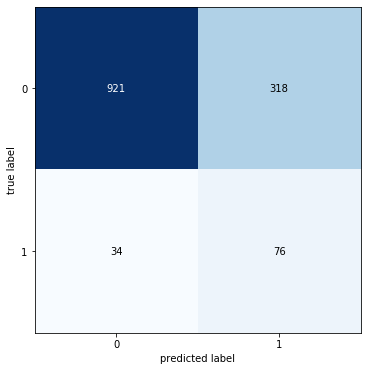

In [180]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=matriz, figsize=(6,6)) #matriz de confusão grafica

In [181]:
#Acurácia, Sensitividade, Especificidade
total = sum(sum(matriz)) #só 1 sum soma apenas cruzado, 2 sum soma tudo
acc = acc
sensitivity = matriz[0, 0] / (matriz[0, 0] + matriz[0, 1]) #acerto / acerto+erro 'label 1'
specificity = matriz[1, 1] / (matriz[1,1] + matriz[1, 0]) #acerto / acerto+erro 'label 2'

print("Acurácia: {:.4f}".format(acc))
print("Sensitividade: {:.4f}".format(sensitivity))
print("Especificidade: {:.4f}".format(specificity))

Acurácia: 0.7391
Sensitividade: 0.7433
Especificidade: 0.6909


## Aplicando Arvore de decisão
<li>A acuracia não mudou mesmo aplicando StandardScaler</li>

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc.fit(xi_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [84]:
y_pred = dtc.predict(xi_test)
y_pred

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [85]:
#Acurácia
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

0.9229058561897702

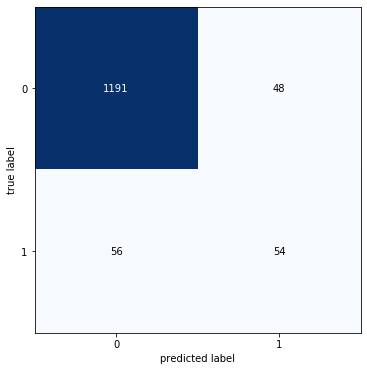

In [86]:
#matriz confusão
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=matriz, figsize=(6,6))

In [97]:
#Acurácia, Sensitividade, Especificidade
total = sum(sum(matriz)) #só 1 sum soma apenas cruzado, 2 sum soma tudo
acc = acc
sensitivity = matriz[0, 0] / (matriz[0, 0] + matriz[0, 1]) #acerto / acerto+erro 'label 1'
specificity = matriz[1, 1] / (matriz[1,1] + matriz[1, 0]) #acerto / acerto+erro 'label 2'

print("Acurácia: {:.4f}".format(acc))
print("Sensitividade: {:.4f}".format(sensitivity))
print("Especificidade: {:.4f}".format(specificity))

Acurácia: 0.9229
Sensitividade: 0.9613
Especificidade: 0.4909


## Aplicação Random forest
<li>Sem StandardScaler:<br>
Criterion = 'entropy' <br>
n_estimators=100 e 1000<br>
Acurácia: 0.9444<br>
Sensitividade: 0.9927<br>
Especificidade: 0.4000<br>
</li><br>

<li>Sem StandardScaler:<br>
Criterion = 'gini' <br>
n_estimators=100 e 1000<br>
Acurácia: 0.9422 e 0.9444<br>
Sensitividade: 0.9919 e 0.9927<br>
Especificidade: 0.3818 e 0.4000<br>
</li><br>

<li>Com StandardScaler:<br>
Criterion = 'entropy' <br>
n_estimators=100 e 1000<br>
Acurácia: 0.9444<br>
Sensitividade: 0.9927<br>
Especificidade: 0.4000<br>
</li><br>

<li>Com StandardScaler:<br>
Criterion = 'gini' <br>
n_estimators=100 e 1000<br>
Acurácia: 0.9422 e 0.9422<br>
Sensitividade: 0.9919 e 0.9919<br>
Especificidade: 0.3818 e 0.3818<br>
</li>

In [167]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000,
                             criterion='gini',
                             random_state=0)
rfc.fit(xi_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [168]:
y_pred = rfc.predict(xi_test)
y_pred

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [169]:
#Acurácia
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.9444032616753151

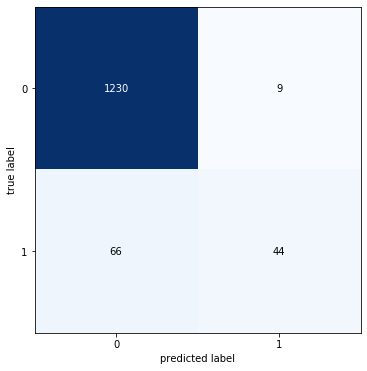

In [170]:
#matriz confusão
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=matriz, figsize=(6,6))

In [166]:
#Acurácia, Sensitividade, Especificidade
total = sum(sum(matriz)) #só 1 sum soma apenas cruzado, 2 sum soma tudo
acc = acc
sensitivity = matriz[0, 0] / (matriz[0, 0] + matriz[0, 1]) #acerto / acerto+erro 'label 1'
specificity = matriz[1, 1] / (matriz[1,1] + matriz[1, 0]) #acerto / acerto+erro 'label 2'

print("Acurácia: {:.4f}".format(acc))
print("Sensitividade: {:.4f}".format(sensitivity))
print("Especificidade: {:.4f}".format(specificity))

Acurácia: 0.9422
Sensitividade: 0.9919
Especificidade: 0.3818


## Aplicando kNN
<li>Sem StandardScaler:<br>
Acurácia: 0.9311<br>
Sensitividade: 0.9805<br>
Especificidade: 0.4103<br>
</li><br>
<li>Com StandardScaler:<br>
Acurácia: 0.9303<br>
Sensitividade: 0.9846<br>
Especificidade: 0.3590<br>
</li>

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #metric='minkowski' e p=2 estamos na condição de distância euclidiana
knn.fit(xi_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
y_pred = knn.predict(xi_test)
y_pred

array(['negative', 'negative', 'negative', ..., 'positive', 'negative',
       'negative'], dtype=object)

In [20]:
# Acurácia
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.9303187546330616

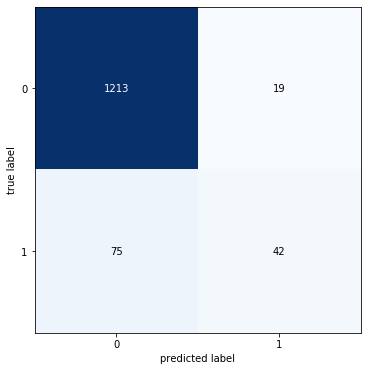

In [21]:
#matriz confusão
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=matriz, figsize=(6,6))

In [22]:
#Acurácia, Sensitividade, Especificidade
total = sum(sum(matriz)) #só 1 sum soma apenas cruzado, 2 sum soma tudo
acc = acc
sensitivity = matriz[0, 0] / (matriz[0, 0] + matriz[0, 1]) #acerto / acerto+erro 'label 1'
specificity = matriz[1, 1] / (matriz[1,1] + matriz[1, 0]) #acerto / acerto+erro 'label 2'

print("Acurácia: {:.4f}".format(acc))
print("Sensitividade: {:.4f}".format(sensitivity))
print("Especificidade: {:.4f}".format(specificity))

Acurácia: 0.9303
Sensitividade: 0.9846
Especificidade: 0.3590


#### Análise do kNN varrendo késimo vizinho
<li>Análise feita sem Standardscale</li>
<li>A melhor acurácia foi em k=7, porém a melhor especificidade foi em k=1</li>

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

acclist = []
for k in tqdm(range(1,15)):
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2) #metric='minkowski' e p=2 estamos na condição de distância euclidiana
    knn.fit(xi_train, y_train)
    y_pred = knn.predict(xi_test)
    acc = accuracy_score(y_test, y_pred)
    acclist.append(acc)
    
    matriz = confusion_matrix(y_test, y_pred)
    total = sum(sum(matriz)) #só 1 sum soma apenas cruzado, 2 sum soma tudo
    sensitivity = matriz[0, 0] / (matriz[0, 0] + matriz[0, 1]) #acerto / acerto+erro 'label 1'
    specificity = matriz[1, 1] / (matriz[1,1] + matriz[1, 0]) #acerto / acerto+erro 'label 2'

    print("k = {}, Acurácia: {:.4f}".format(k, acc))
    print("k = {}, Sensitividade: {:.4f}".format(k, sensitivity))
    print("k = {}, Especificidade: {:.4f}".format(k, specificity))

  7%|▋         | 1/14 [00:11<02:29, 11.49s/it]

k = 1, Acurácia: 0.9259
k = 1, Sensitividade: 0.9578
k = 1, Especificidade: 0.5897


 14%|█▍        | 2/14 [00:23<02:20, 11.67s/it]

k = 2, Acurácia: 0.9311
k = 2, Sensitividade: 0.9830
k = 2, Especificidade: 0.3846


 21%|██▏       | 3/14 [00:35<02:09, 11.81s/it]

k = 3, Acurácia: 0.9311
k = 3, Sensitividade: 0.9740
k = 3, Especificidade: 0.4786


 29%|██▊       | 4/14 [00:47<01:59, 11.91s/it]

k = 4, Acurácia: 0.9311
k = 4, Sensitividade: 0.9894
k = 4, Especificidade: 0.3162


 36%|███▌      | 5/14 [01:00<01:47, 11.98s/it]

k = 5, Acurácia: 0.9311
k = 5, Sensitividade: 0.9805
k = 5, Especificidade: 0.4103


 43%|████▎     | 6/14 [01:12<01:36, 12.03s/it]

k = 6, Acurácia: 0.9288
k = 6, Sensitividade: 0.9886
k = 6, Especificidade: 0.2991


 50%|█████     | 7/14 [01:24<01:24, 12.07s/it]

k = 7, Acurácia: 0.9325
k = 7, Sensitividade: 0.9878
k = 7, Especificidade: 0.3504


 57%|█████▋    | 8/14 [01:36<01:12, 12.09s/it]

k = 8, Acurácia: 0.9266
k = 8, Sensitividade: 0.9878
k = 8, Especificidade: 0.2821


 64%|██████▍   | 9/14 [01:48<01:00, 12.10s/it]

k = 9, Acurácia: 0.9288
k = 9, Sensitividade: 0.9878
k = 9, Especificidade: 0.3077


 71%|███████▏  | 10/14 [02:00<00:48, 12.11s/it]

k = 10, Acurácia: 0.9281
k = 10, Sensitividade: 0.9903
k = 10, Especificidade: 0.2735


 79%|███████▊  | 11/14 [02:12<00:36, 12.13s/it]

k = 11, Acurácia: 0.9288
k = 11, Sensitividade: 0.9886
k = 11, Especificidade: 0.2991


 86%|████████▌ | 12/14 [02:25<00:24, 12.13s/it]

k = 12, Acurácia: 0.9274
k = 12, Sensitividade: 0.9919
k = 12, Especificidade: 0.2479


 93%|█████████▎| 13/14 [02:37<00:12, 12.13s/it]

k = 13, Acurácia: 0.9274
k = 13, Sensitividade: 0.9903
k = 13, Especificidade: 0.2650


100%|██████████| 14/14 [02:49<00:00, 12.09s/it]

k = 14, Acurácia: 0.9236
k = 14, Sensitividade: 0.9927
k = 14, Especificidade: 0.1966


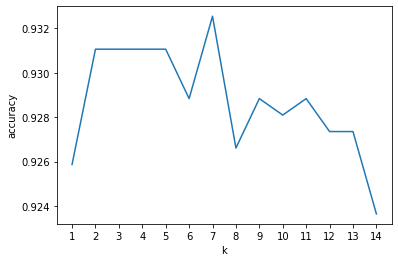

In [33]:
import matplotlib.pyplot as plt
k = [x for x in range(1,15)]
plt.plot(k, acclist)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xticks(k)
plt.show()

# Aplicando Regressão logistica para classificação
<li>Sem StandardScaler:<br>
Acurácia: 0.9296<br>
Sensitividade: 0.9773<br>
Especificidade: 0.4274<br>
</li><br>
<li>Com StandardScaler:<br>
Acurácia: 0.9118<br>
Sensitividade: 0.9537<br>
Especificidade: 0.4701<br>
</li>

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(xi_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
#predição
y_pred = lr.predict(xi_test)
y_pred

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [39]:
# Acurácia
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.9117865085248332

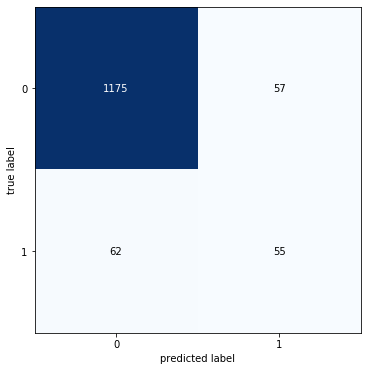

In [40]:
#matriz confusão
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=matriz, figsize=(6,6))

In [41]:
#Acurácia, Sensitividade, Especificidade
total = sum(sum(matriz)) #só 1 sum soma apenas cruzado, 2 sum soma tudo
acc = acc
sensitivity = matriz[0, 0] / (matriz[0, 0] + matriz[0, 1]) #acerto / acerto+erro 'label 1'
specificity = matriz[1, 1] / (matriz[1,1] + matriz[1, 0]) #acerto / acerto+erro 'label 2'

print("Acurácia: {:.4f}".format(acc))
print("Sensitividade: {:.4f}".format(sensitivity))
print("Especificidade: {:.4f}".format(specificity))

Acurácia: 0.9118
Sensitividade: 0.9537
Especificidade: 0.4701


# Aplicando SVM para classificação

In [54]:
#rodando o modelo
from sklearn.svm import SVC
svm = SVC(C=15, kernel='rbf', random_state=1)
svm.fit(xi_train, y_train)

SVC(C=15, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [55]:
#predição
y_pred = svm.predict(xi_test)

In [56]:
# Acurácia
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.9436619718309859

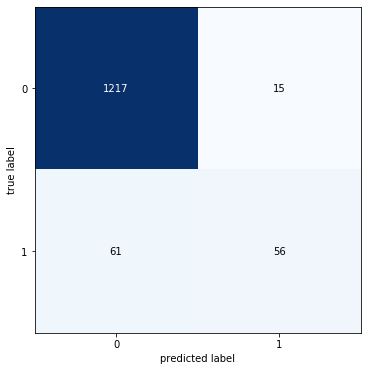

In [57]:
#matriz confusão
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=matriz, figsize=(6,6))

In [58]:
#Acurácia, Sensitividade, Especificidade
total = sum(sum(matriz)) #só 1 sum soma apenas cruzado, 2 sum soma tudo
acc = acc
sensitivity = matriz[0, 0] / (matriz[0, 0] + matriz[0, 1]) #acerto / acerto+erro 'label 1'
specificity = matriz[1, 1] / (matriz[1,1] + matriz[1, 0]) #acerto / acerto+erro 'label 2'

print("Acurácia: {:.4f}".format(acc))
print("Sensitividade: {:.4f}".format(sensitivity))
print("Especificidade: {:.4f}".format(specificity))

Acurácia: 0.9437
Sensitividade: 0.9878
Especificidade: 0.4786


# Utilizando Redes neurais (tensorflow/keras)

In [100]:
import pandas as pd
import numpy as np

In [101]:
path = '/dados/banco_de_dados/Machine_Learning_UCI/qsar_toxicitydrugs/qsar_oral_toxicity.csv'
df = pd.read_csv(path, sep=';', header=None)

In [102]:
colnamess = [str(x) for x in range(0,1024)]
colnamess.append('y')
df.columns = colnamess #passando o nome das colunas para string
df

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8987,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,negative
8988,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,negative
8989,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,negative
8990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


<li>Montando um novo Dataframe com o mesmo numero de positivos e negativos.</li>
<li>Tentando melhorar a especificidade.</li>
<li>Peguei todos os positivos (741), e peguei o mesmo numero de negativos aleatoriamente.</li>

In [103]:
df_positive = df.loc[df['y'] == 'positive']
df_negative = df.loc[df['y'] == 'negative'].sample(n=741, random_state=1)
new_df = pd.concat([df_positive, df_negative])
new_df = new_df.sample(n=1482, random_state=0)

In [104]:
new_index = [x for x in range(len(new_df['y']))]

In [105]:
new_df.index = new_index
new_df

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,y
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,negative
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1479,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,negative
1480,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,positive


In [106]:
xi = new_df.iloc[:, 0:1024].values
y = new_df.iloc[:, 1024].values

In [107]:
from sklearn.preprocessing import LabelEncoder
encond = LabelEncoder()
y = encond.fit_transform(y) #0 negative 1 positive

In [90]:
#Aplicando reescalonamento
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xi = ss.fit_transform(xi)
xi

array([[ 2.07192112, -0.22761765,  3.29484446, ..., -0.1577855 ,
        -0.15323401, -0.14855627],
       [ 2.07192112, -0.22761765, -0.30350446, ..., -0.1577855 ,
        -0.15323401, -0.14855627],
       [-0.48264386, -0.22761765, -0.30350446, ..., -0.1577855 ,
        -0.15323401, -0.14855627],
       ...,
       [-0.48264386, -0.22761765, -0.30350446, ..., -0.1577855 ,
        -0.15323401, -0.14855627],
       [ 2.07192112, -0.22761765, -0.30350446, ..., -0.1577855 ,
        -0.15323401, -0.14855627],
       [-0.48264386, -0.22761765, -0.30350446, ..., -0.1577855 ,
        -0.15323401, -0.14855627]])

In [217]:
from sklearn.model_selection import train_test_split
xi_train, xi_test, y_train, y_test = train_test_split(xi, y, test_size=0.15, random_state=600)

In [218]:
print('Treino = {}, Teste = {}'.format(len(xi_train), len(xi_test)))

Treino = 1259, Teste = 223


In [235]:
#Hiperparametros
batch_size=8
epoch = 100
alpha = 1e-4

In [236]:
#Callbacks (Nao utilizei)
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
weight_file = 'weights_jeff.hdf5'
checkpoint = ModelCheckpoint(filepath=weight_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.01, min_delta=alpha, patience=5, verbose=1)

callbacks = [checkpoint, lr_reduce]

In [237]:
#Modelo
from keras.models import Sequential
from keras.layers import Dense, Dropout

rede = Sequential() #instanciando a nossa rede
rede.add(Dense(units=600, activation='relu', input_dim=1024))
rede.add(Dense(units=500, activation='relu'))
rede.add(Dense(units=400, activation='relu'))
rede.add(Dropout(0.6, seed=600))
rede.add(Dense(units=300, activation='relu'))
rede.add(Dense(units=200, activation='relu'))
rede.add(Dense(units=100, activation='relu'))
rede.add(Dense(units=1, activation='sigmoid')) #Camada de saída

In [238]:
rede.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 600)               615000    
_________________________________________________________________
dense_111 (Dense)            (None, 500)               300500    
_________________________________________________________________
dense_112 (Dense)            (None, 400)               200400    
_________________________________________________________________
dropout_22 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_113 (Dense)            (None, 300)               120300    
_________________________________________________________________
dense_114 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_115 (Dense)            (None, 100)             

In [250]:
rede.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = rede.fit(xi_train, y_train,
                   epochs=epoch,
                   batch_size=batch_size)

Epoch 1/100
1259/1259 [==============================] - 1s 639us/step - loss: 5.3955e-10 - accuracy: 1.0000
Epoch 2/100
1259/1259 [==============================] - 1s 506us/step - loss: 1.3830e-11 - accuracy: 1.0000
Epoch 3/100
1259/1259 [==============================] - 1s 508us/step - loss: 4.0656e-11 - accuracy: 1.0000
Epoch 4/100
1259/1259 [==============================] - 1s 499us/step - loss: 2.9983e-10 - accuracy: 1.0000
Epoch 5/100
1259/1259 [==============================] - 1s 494us/step - loss: 7.8520e-11 - accuracy: 1.0000
Epoch 6/100
1259/1259 [==============================] - 1s 491us/step - loss: 0.2175 - accuracy: 0.9698
Epoch 7/100
1259/1259 [==============================] - 1s 503us/step - loss: 0.3048 - accuracy: 0.9039
Epoch 8/100
1259/1259 [==============================] - 1s 497us/step - loss: 0.0855 - accuracy: 0.9778
Epoch 9/100
1259/1259 [==============================] - 1s 498us/step - loss: 0.0279 - accuracy: 0.9944
Epoch 10/100
1259/1259 [===========

In [251]:
# predição
y_pred = rede.predict(xi_test) #dessa forma o retorno é os valores da sigmoid, nós temos que encodificar e pegar a classificação na mão
y_pred = y_pred > 0.85 #matriz de True or False


In [252]:
# Acurácia
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.8430493273542601

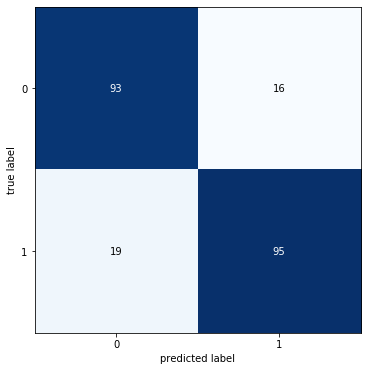

In [253]:
#matriz de confusão
#matriz de confusão
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=matriz, figsize=(6,6)) #matriz de confusão grafica

In [254]:
#Acurácia, Sensitividade, Especificidade
total = sum(sum(matriz)) #só 1 sum soma apenas cruzado, 2 sum soma tudo
acc = acc
sensitivity = matriz[0, 0] / (matriz[0, 0] + matriz[0, 1]) #acerto / acerto+erro 'label 1'
specificity = matriz[1, 1] / (matriz[1,1] + matriz[1, 0]) #acerto / acerto+erro 'label 2'

print("Acurácia: {:.4f}".format(acc))
print("Sensitividade: {:.4f}".format(sensitivity))
print("Especificidade: {:.4f}".format(specificity))

Acurácia: 0.8430
Sensitividade: 0.8532
Especificidade: 0.8333
